In [400]:
import numpy as np
import matplotlib.pyplot as plt

In [401]:
class Board:
    def __init__(self):
        self.grid = np.zeros((16,16,3))
        self.queenz = {'red':{'row':0,'col':0},'blue':{'row':0,'col':0}}
        for row in range(16):      
            for col in range(16):  
                if (not col % 2 and not row % 2 ) or (col % 2 and row % 2):
                    self.grid[row,col] = (.9,.9,.9)
    
    def render (self):
        plt.imshow(self.grid)
    def add_red(self, row, col,color):
        self.grid[row,col] = color
        self.queenz["red"]["row"] = row
        self.queenz["red"]["col"] = col
        
    
    def add_attack_queen(self, row, col,color):
        self.grid[row,col] = color
        self.queenz["blue"]["row"] = row
        self.queenz["blue"]["col"] = col
        
    def is_under_attack(self):
        return self.check_horizantal() or self.check_diagonal()
    
    def check_horizantal(self):
        substract_row = abs(self.queenz["red"]["row"] - self.queenz["blue"]["row"] )
        substract_col = abs(self.queenz["red"]["col"] - self.queenz["blue"]["col"])
        return True if substract_row  == substract_col else False
    
    def check_diagonal(self):
        substract_row = (self.queenz["blue"]["row"] is self.queenz["red"]["row"])
        substract_col = (self.queenz["blue"]["col"] is self.queenz["red"]["col"])
        return True if  substract_row or substract_col else False 


**<ins> Test**

- [x] queens on same row should be “under attack”
- [x] queens on same column should be “under attack”
- [x] queens on same diagonal should be “under attack”
- [x] queens with any other coordinates should NOT be “under attack”

In [402]:
# queens on same row should be “under attack”
board = Board()
board.add_attack_queen(6,0,(0,1,1) )
board.add_red(6,3,(1,.2,0))
assert board.is_under_attack() == True
# queens on same column should be “under attack”
board.add_attack_queen(1,3,(0,1,0) )
assert board.is_under_attack() == True
# queens on same diagonal should be “under attack”
board.add_attack_queen(2,7,(0,0,1) )
assert board.is_under_attack() == True
# queens with any other coordinates should NOT be “under attack”
board.add_attack_queen(3,4,(3,5,0) )
assert board.is_under_attack() == False


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


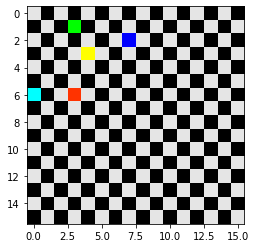

In [403]:
board.render()